In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [38]:
import numpy as np
import figs.utilities.config_helper as ch
import figs.utilities.transform_helper as th
from figs.control.vehicle_rate_fqp import VehicleRateFQP
import sousvide.visualize.plot_time as pt
import sousvide.visualize.plot_3D as p3d
import matplotlib.pyplot as plt

np.random.seed(0)
mu_md = np.zeros(10)
std_md = np.array([
            0.40, 0.40, 0.40,
            0.40, 0.40, 0.40,
            0.20, 0.20, 0.20, 0.20
            ])

policy = ch.get_config("vrfqp_fr","pilots")
course = ch.get_config("robustness_track","courses")
# course = ch.get_config("line","courses")

test = VehicleRateFQP(policy,course)

/home/admin/Personal/Kitchen/FiGS/src/figs/utilities/polynomial_helper.py:85: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  val, _ = quad(integrand, -1, 1)


(15, 61)


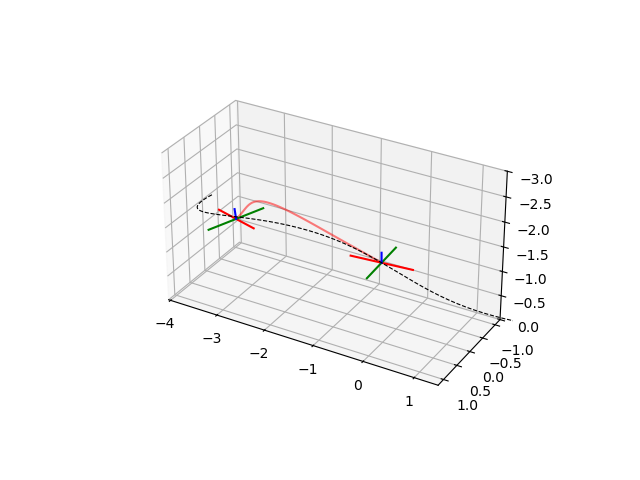

(15, 61)


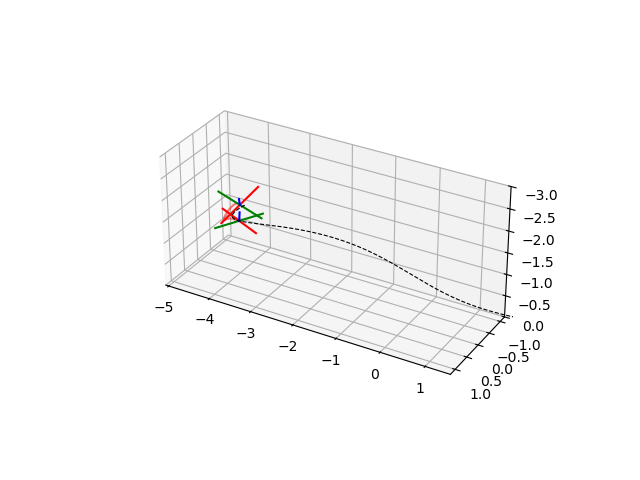

(15, 61)


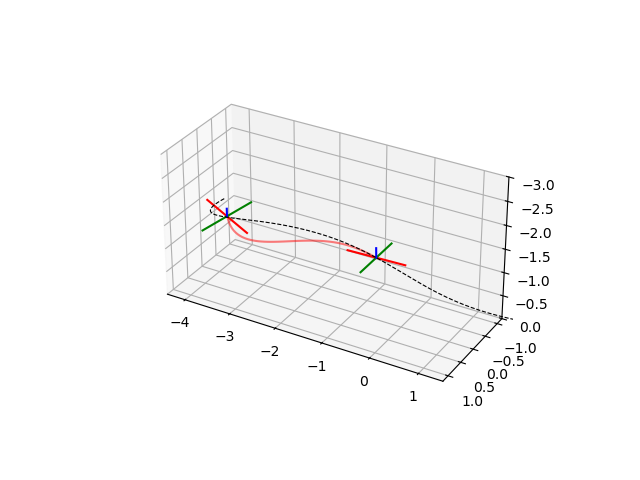

(15, 61)


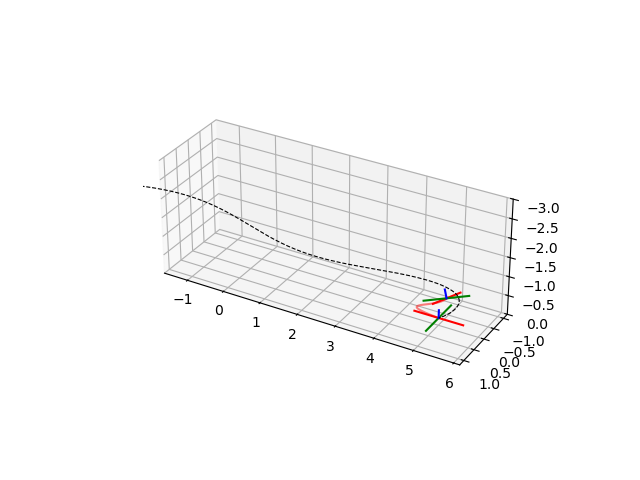

(15, 61)


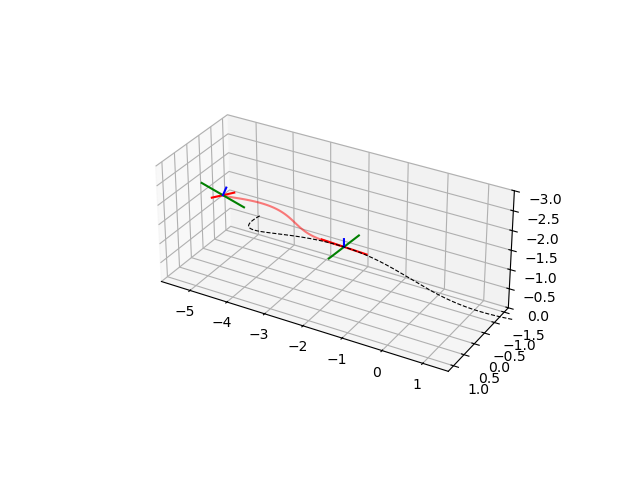

(15, 61)


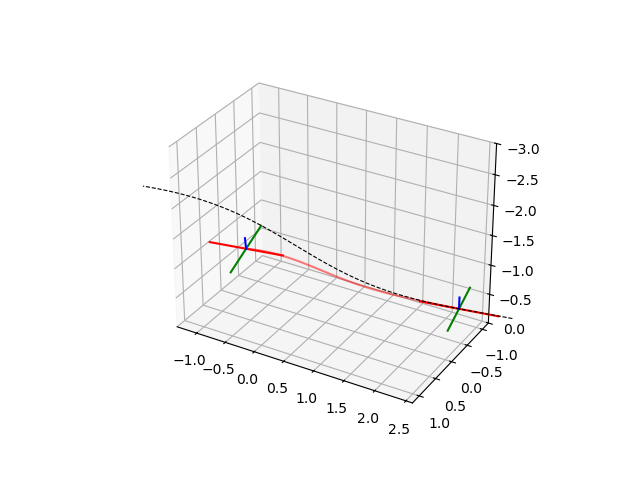

(15, 61)


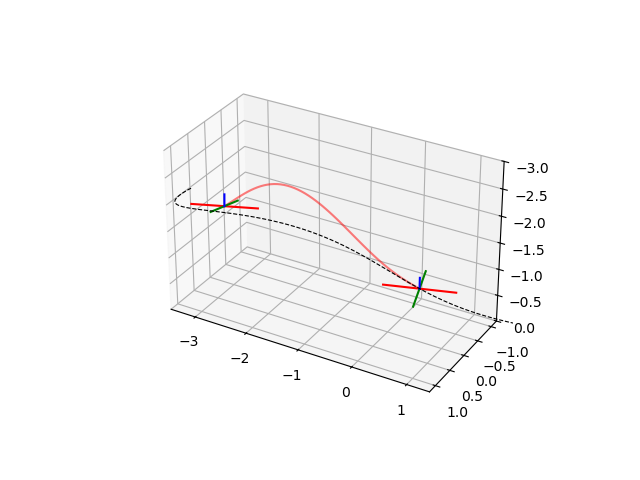

(15, 61)


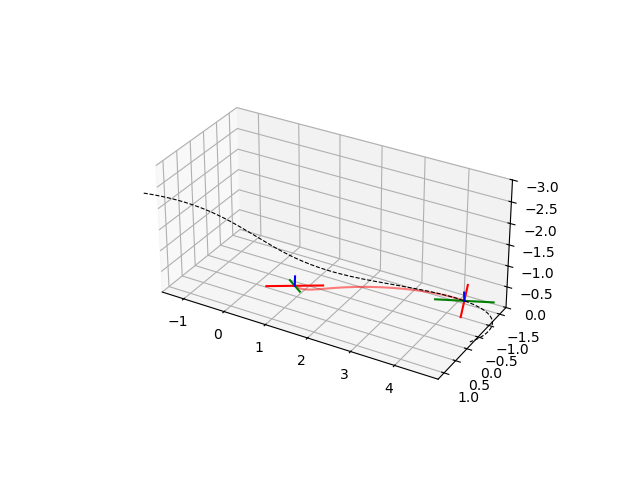

(15, 61)


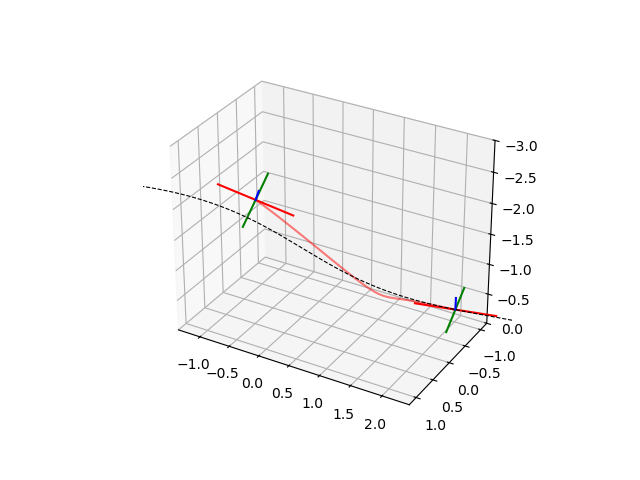

(15, 61)


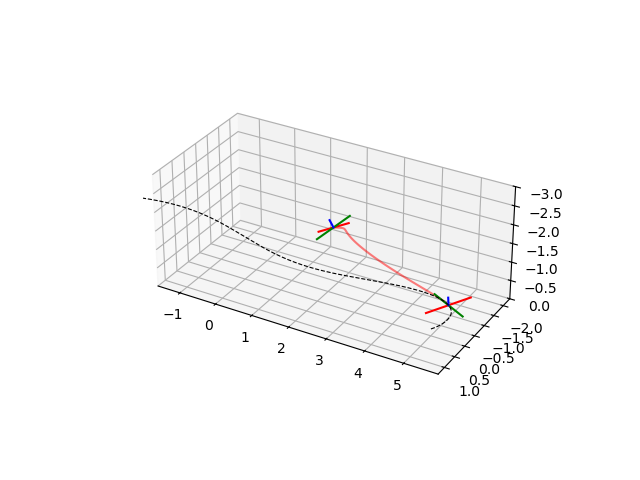

In [47]:
Ntest = 10

for i in range(Ntest):
    k = np.random.randint(0,test.tXUd.shape[1])
    tp = test.tXUd[0,k-1]
    xp = test.tXUd[1:11,k-1]
    up = test.tXUd[11:15,k-1]

    # Perturb the state
    xp = xp + np.random.normal(mu_md, std_md)
    xp[6:10] = xp[6:10]/np.linalg.norm(xp[6:10])

    tXU,costs = test.control(tp,xp,up)
    print(tXU.shape)
    p3d.tXU_to_3D([tXU],tXUd=test.tXUd)
    # # Plot cost
    # plt.figure()
    # plt.plot(costs)
    # plt.axvline(x=idx0, color='r', linestyle='--')
    # plt.show()
